In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
# Set the path to the dataset folder
dataset_path = "C:/Users/soumi/Downloads/brain_tumor_dataset" # Replace 'path/to/brain_tumor_dataset' with the actual path to your dataset folder

# Set the image dimensions
image_width, image_height = 150, 150

# Load the dataset from the folders
def load_dataset(folder_path):
    X = []
    y = []
    class_labels = ['no', 'yes']  # Assuming 'no' folder corresponds to class 0 and 'yes' folder corresponds to class 1

    for class_label in class_labels:
        class_folder_path = os.path.join(folder_path, class_label)
        for filename in os.listdir(class_folder_path):
            if filename.endswith('.jpeg') or filename.endswith('.jpg'):
                image_path = os.path.join(class_folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (image_width, image_height))
                X.append(image)
                y.append(class_labels.index(class_label))

    X = np.array(X)
    y = np.array(y)
    return X, y

X, y = load_dataset(dataset_path)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the image data for logistic regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [4]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train_flat, y_train)
logreg_pred = logreg.predict(X_test_flat)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [5]:
# Support Vector Machine (SVM) Classifier
svm = SVC()
svm.fit(X_train_flat, y_train)
svm_pred = svm.predict(X_test_flat)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [6]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_flat, y_train)
rf_pred = rf.predict(X_test_flat)
rf_accuracy = accuracy_score(y_test, rf_pred)

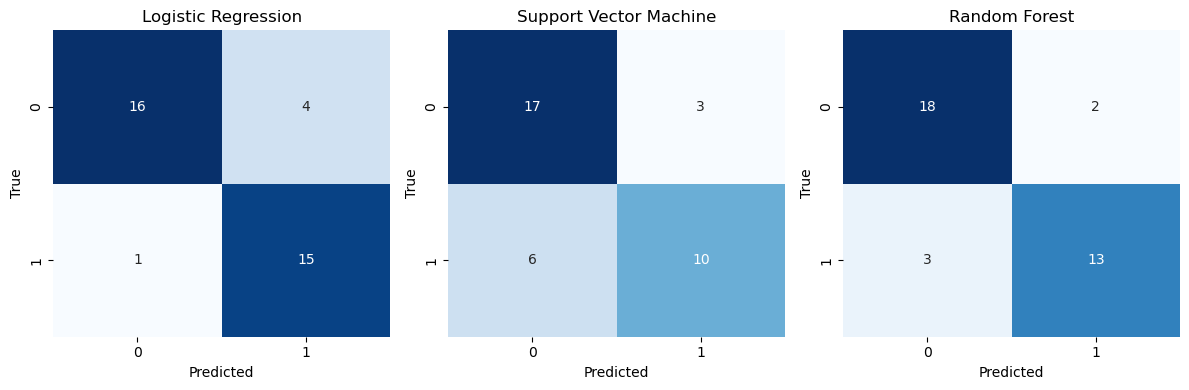

In [8]:
#Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [9]:
# Print the accuracies
print("Logistic Regression Accuracy:", logreg_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.8611111111111112
SVM Accuracy: 0.75
Random Forest Accuracy: 0.8611111111111112


In [16]:
#Plot some sample predictions
def plot_sample_predictions(images, true_labels, predicted_labels):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        predicted_label = 'Tumor' if predicted_labels[i] == 1 else 'No Tumor'
        color = 'green' if true_labels[i] == predicted_labels[i] else 'red'
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_label}', color=color)
        plt.tight_layout()
        plt.show()

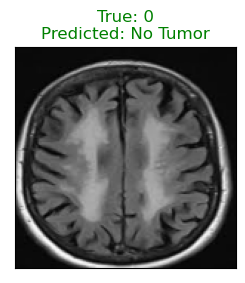

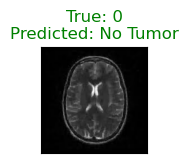

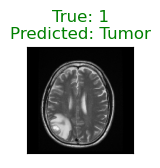

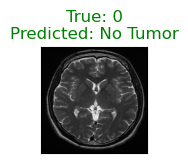

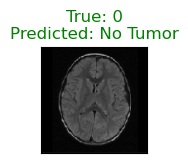

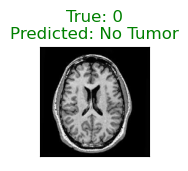

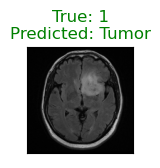

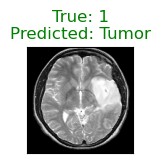

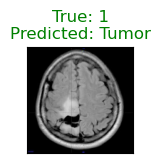

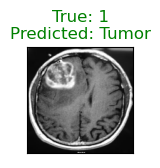

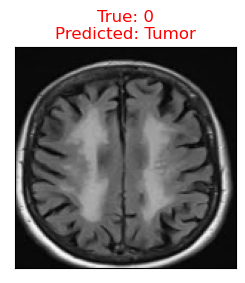

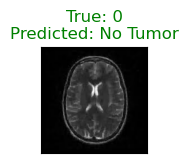

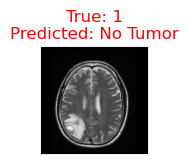

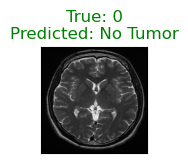

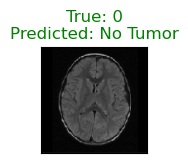

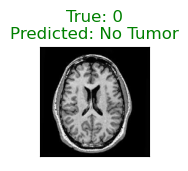

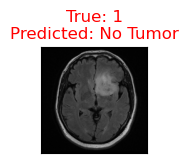

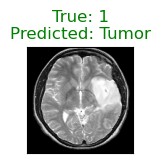

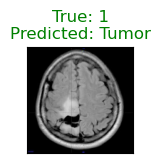

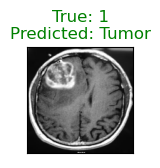

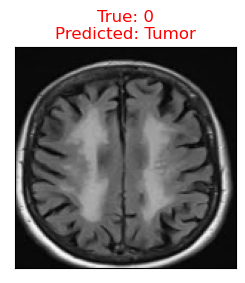

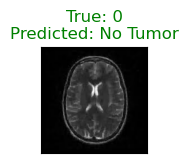

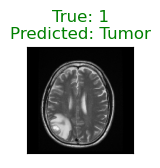

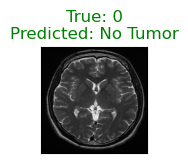

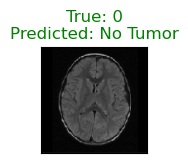

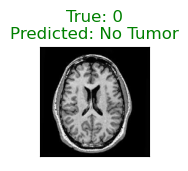

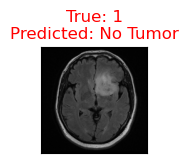

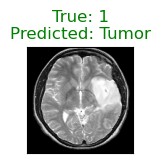

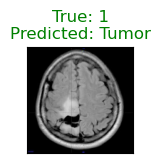

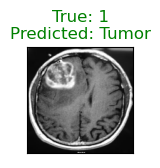

In [17]:
#Plot sample predictions for each classifier
logreg_sample_predictions = logreg.predict(X_test_flat[:10])
svm_sample_predictions = svm.predict(X_test_flat[:10])
rf_sample_predictions = rf.predict(X_test_flat[:10])

plot_sample_predictions(X_test[:10], y_test[:10], logreg_sample_predictions)
plot_sample_predictions(X_test[:10], y_test[:10], svm_sample_predictions)
plot_sample_predictions(X_test[:10], y_test[:10], rf_sample_predictions)

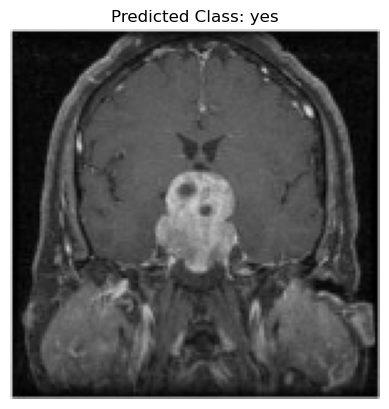

In [20]:
# Test a new image path
new_image_path = "C:/Users/soumi/Downloads/WhatsApp Image 2023-05-11 at 10.47.37 PM.jpeg"  # Replace 'path/to/new_image.jpg' with the path to your new image

# Read and preprocess the new image
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (image_width, image_height))
new_image_flat = new_image.reshape(1, -1)

# Use the trained model to predict the class of the new image
prediction = logreg.predict(new_image_flat)
class_label = 'yes' if prediction == 1 else 'no'

# Display the new image with the predicted class label
plt.imshow(new_image)
plt.title(f'Predicted Class: {class_label}')
plt.axis('off')
plt.show()


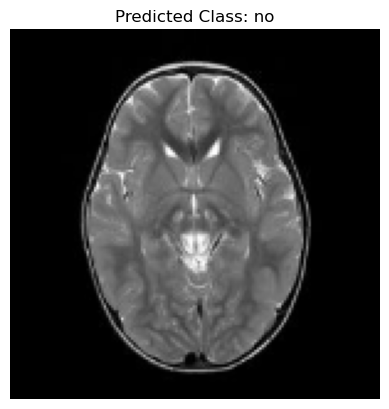

In [21]:
# Test a new image path
new_image_path = "C:/Users/soumi/Downloads/WhatsApp Image 2023-05-11 at 10.50.15 PM.jpeg"  # Replace 'path/to/new_image.jpg' with the path to your new image

# Read and preprocess the new image
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (image_width, image_height))
new_image_flat = new_image.reshape(1, -1)

# Use the trained model to predict the class of the new image
prediction = logreg.predict(new_image_flat)
class_label = 'yes' if prediction == 1 else 'no'

# Display the new image with the predicted class label
plt.imshow(new_image)
plt.title(f'Predicted Class: {class_label}')
plt.axis('off')
plt.show()
